In [16]:
from ML_Objects import Neuron
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_decision_regions

In [17]:
df = pd.read_csv('data/Brickset-Most-Owned-Query-33-02042023.csv')
df = df.loc[(df.Theme == "Duplo") | (df.Theme == "City")]
df = df.filter(["Number", "Theme", "Pieces", "Weight"])
df = df.dropna()
df['Bias'] = 1
df['Indicator'] = [2 * (df['Theme'][ind] == "Duplo") - 1 for ind in df.index]
print(df)
print(np.sum(df['Theme'] == 'Duplo'))
print(np.sum(df['Theme'] == 'City'))

        Number  Theme  Pieces    Weight  Bias  Indicator
230    60097-1   City  1683.0  3.193288     1         -1
272    60271-1   City  1517.0  3.058000     1         -1
397    60198-1   City  1226.0  3.032000     1         -1
408    60200-1   City  1211.0  2.422000     1         -1
458    60336-1   City  1153.0  2.764000     1         -1
...        ...    ...     ...       ...   ...        ...
14226  60236-1   City     2.0  0.200000     1         -1
14278  60237-1   City     2.0  0.200000     1         -1
14325   7280-1   City     2.0  0.195220     1         -1
14326   7281-1   City     2.0  0.195220     1         -1
14384   2304-1  Duplo     1.0  0.263320     1          1

[765 rows x 6 columns]
276
489


In [18]:
signal = df.filter(['Pieces', 'Weight', 'Bias'])
response = df.filter(['Indicator'])

In [19]:
class Perceptron(Neuron):
    def activation(self, preactivation):
        '''
        Computes the postactivation value
        INPUT
            preactivation; the scalar-valued preactivation value
        RETURNS
            Perceptron post-activation value; equal to the predicted category
        '''
        return 2 * (preactivation > 0) - 1

    def update(self, signal, actual, predicted):
        '''
        Updates the Perceptron weights.
        INPUTS
            signal; the data input signal
            actual; the actual sign of the category
            predicted; the sign of the category predicted by activation()
        '''
        self.weights += 1/2 * (actual - predicted) * signal

    def train(self, epochs, signals, actuals):
        '''
        Trains the Perceptron for a given number of epochs, or until no errors occur through an entire epoch.
        INPUT
            epochs; maximum number of epochs to train
            signals; dataframe of signal vectors, with one row per data observation and one column per feature
            actuals; single-column dataframe of actual observations, with one row per data observation 
        RETURNS
            array of length n, where n is the number of trained epochs, and item at index i is the number of errors in epoch i 
        '''
        errors = []
        for _ in tqdm(range(epochs)):
            err = 0
            for ind in range(len(df)):
                actual = actuals.iloc[ind, 0]
                predicted = self.fire(signals.iloc[ind, :])
                err += (actual != predicted)
                self.update(signals.iloc[ind, :], actual, predicted)
            errors.append(err)
            if err == 0:
                return errors
        return errors

In [20]:
percept = Perceptron()
percept.weights = np.zeros((3,))
errors = percept.train(epochs=250, signals=signal, actuals=response)
print(errors)
print(percept.weights)

100%|██████████| 250/250 [00:56<00:00,  4.42it/s]

[143, 67, 42, 61, 29, 29, 35, 35, 35, 23, 23, 25, 25, 28, 129, 31, 26, 103, 25, 31, 25, 25, 22, 105, 25, 25, 22, 113, 23, 24, 24, 24, 24, 29, 21, 22, 26, 34, 22, 34, 22, 57, 20, 20, 41, 20, 20, 20, 41, 18, 20, 20, 41, 20, 20, 20, 37, 20, 20, 20, 37, 20, 18, 20, 37, 20, 22, 22, 24, 64, 37, 20, 35, 18, 20, 35, 18, 20, 55, 18, 18, 19, 113, 18, 18, 18, 20, 20, 20, 21, 114, 20, 20, 20, 21, 30, 20, 20, 20, 20, 21, 102, 20, 20, 20, 20, 21, 62, 18, 20, 20, 21, 62, 18, 20, 20, 21, 102, 18, 20, 21, 35, 20, 20, 21, 35, 20, 21, 35, 20, 20, 21, 35, 20, 20, 21, 35, 20, 21, 33, 19, 35, 21, 35, 20, 21, 35, 20, 21, 59, 21, 57, 17, 20, 16, 17, 57, 17, 32, 16, 16, 17, 34, 31, 31, 20, 16, 16, 16, 16, 16, 16, 17, 60, 19, 20, 16, 16, 16, 17, 98, 19, 35, 16, 16, 16, 16, 17, 34, 35, 16, 16, 16, 16, 17, 34, 35, 18, 16, 16, 16, 17, 34, 57, 16, 16, 16, 16, 16, 16, 16, 17, 34, 57, 16, 16, 16, 16, 16, 16, 17, 34, 33, 16, 16, 17, 33, 16, 16, 17, 33, 16, 16, 17, 33, 16, 16, 17, 33, 16, 16, 17, 33, 16, 16, 17, 33, 16

([0, 3.83], [11.461538461538462, 609.4505817581424])


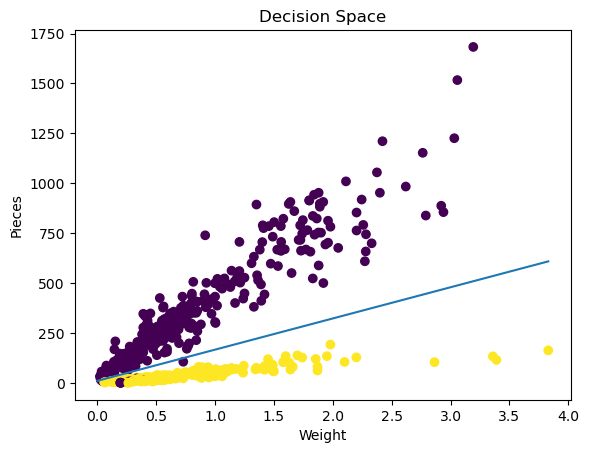

In [27]:
plt.scatter(signal['Weight'], signal['Pieces'], c=response['Indicator']+1)

slope = -1 * percept.weights['Weight'] / percept.weights['Pieces']
intercept = percept.weights['Bias'] / percept.weights['Pieces']
print(([0, max(signal['Weight'])], [intercept, slope * max(signal['Weight']) + intercept]))
plt.plot([0, max(signal['Weight'])], [intercept, slope * max(signal['Weight']) + intercept])

plt.xlabel("Weight")
plt.ylabel("Pieces")
plt.title("Decision Space")
plt.show()

Text(0.5, 1.0, 'Error rate over epochs')

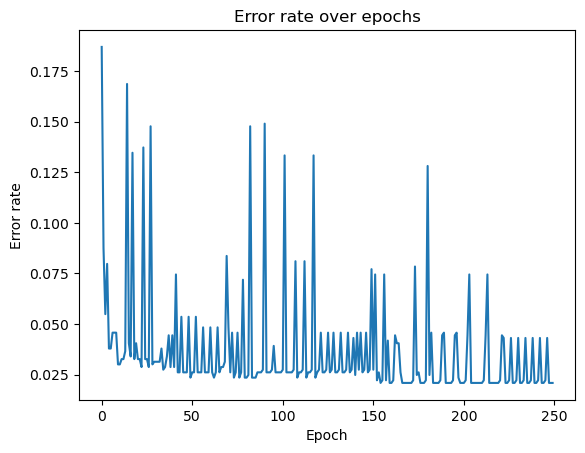

In [30]:
plt.plot(range(len(errors)), [err / len(response) for err in errors])
plt.xlabel("Epoch")
plt.ylabel("Error rate")
plt.title("Error rate over epochs")